# Python imports

In [1]:
from skimage import io
import numpy as np
import random
import tensorflow as tf
from tqdm import tqdm
from csbdeep.utils import plot_history, Path, normalize
from matplotlib import pyplot as plt
from tifffile import imread, TiffFile


# A couple requried imports
from glob import glob 
from PIL import Image

# Importing the deep learning framework
from csbdeep.models import CARE, Config

from csbdeep.utils import plot_some, plot_history

import urllib
import os
import zipfile

Using TensorFlow backend.


In [2]:
base_dir = r'X:\GautamDey\2020\Fast Nup imaging\172 separate for denoising\Les1'

base_path = Path(base_dir)
raw_files = sorted(Path(base_path/r'raw data').rglob('*.tif'))
print(f'There are {len(raw_files)} files to analyse!')

There are 11 files to analyse!


In [3]:
ims = []

for file in raw_files:
    T = imread(str(file))
    print(f'T has shape {T.shape}')
    ims.append(T)

T has shape (400, 512, 512)
T has shape (400, 512, 512)
T has shape (400, 512, 512)
T has shape (400, 512, 512)
T has shape (400, 512, 512)
T has shape (400, 512, 512)
T has shape (400, 512, 512)
T has shape (400, 512, 512)
T has shape (400, 512, 512)
T has shape (400, 512, 512)
T has shape (400, 512, 512)


In [4]:
patch_size = 64
n_patch_train = 2000
n_patch_val = 200

X = []
Y = []
X_val = []
Y_val = []

for n in range(n_patch_train):
    im = random.choice(ims)
    frame = random.choice(range(im.shape[0]))-1
    x_start = random.choice(range(im.shape[1]-patch_size))
    y_start = random.choice(range(im.shape[2]-patch_size))
    X.append(im[frame][x_start:x_start+patch_size, y_start:y_start+patch_size])
    Y.append(im[frame+1][x_start:x_start+patch_size, y_start:y_start+patch_size])
    
for n in range(n_patch_val):
    im = random.choice(ims)
    frame = random.choice(range(im.shape[0]))-1
    x_start = random.choice(range(im.shape[1]-patch_size))
    y_start = random.choice(range(im.shape[2]-patch_size))
    X_val.append(im[frame][x_start:x_start+patch_size, y_start:y_start+patch_size])
    Y_val.append(im[frame+1][x_start:x_start+patch_size, y_start:y_start+patch_size])
    
X = np.array(X)
Y = np.array(Y)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

# add channel dimension for n2v
X = X[..., np.newaxis]
Y = Y[..., np.newaxis]
X_val = X_val[..., np.newaxis]
Y_val = Y_val[..., np.newaxis]

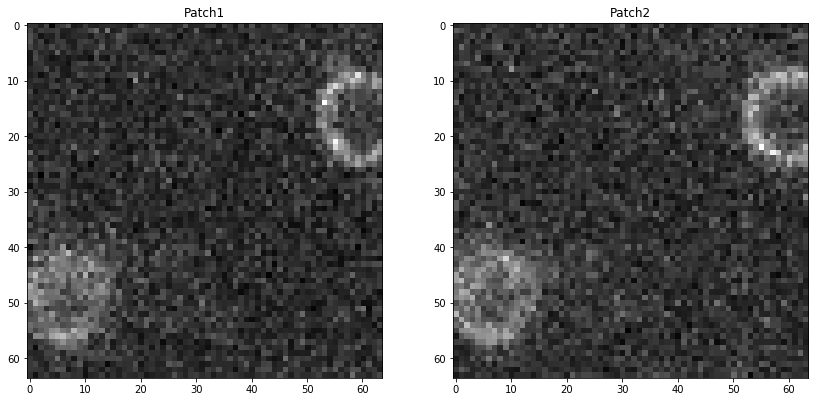

In [6]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(X[1,...,0], cmap='gray')
plt.title('Patch1');
plt.subplot(1,2,2)
plt.imshow(Y[1,...,0], cmap='gray')
plt.title('Patch2');

In [7]:
X = [normalize(x,1,99.8) for x in tqdm(X)]
Y = [normalize(x,1,99.8) for x in tqdm(Y)]
X_val = [normalize(x,1,99.8) for x in tqdm(X_val)]
Y_val = [normalize(x,1,99.8) for x in tqdm(Y_val)]

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 2357.19it/s]


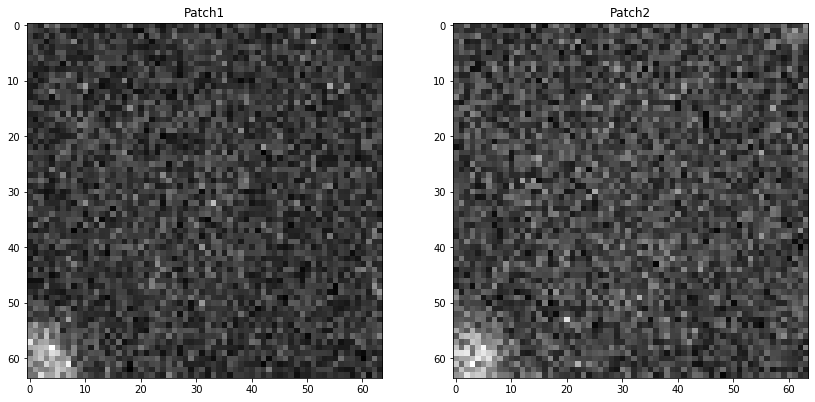

In [8]:
X = np.array(X)
Y = np.array(Y)
X_val = np.array(X_val)
Y_val = np.array(Y_val)


plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(X[0,...,0], cmap='gray')
plt.title('Patch1');
plt.subplot(1,2,2)
plt.imshow(Y[0,...,0], cmap='gray')
plt.title('Patch2');

In [9]:
config = Config(axes='YXC', n_channel_in=1, n_channel_out=1, train_loss='mse', unet_kern_size=3,
               train_steps_per_epoch=200, train_epochs=100)
vars(config)

{'n_dim': 2,
 'axes': 'YXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'train_checkpoint': 'weights_best.h5',
 'train_checkpoint_last': 'weights_last.h5',
 'train_checkpoint_epoch': 'weights_now.h5',
 'probabilistic': False,
 'unet_residual': True,
 'unet_n_depth': 2,
 'unet_kern_size': 3,
 'unet_n_first': 32,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, 1),
 'train_loss': 'mse',
 'train_epochs': 100,
 'train_steps_per_epoch': 200,
 'train_learning_rate': 0.0004,
 'train_batch_size': 16,
 'train_tensorboard': True,
 'train_reduce_lr': {'factor': 0.5, 'patience': 10, 'min_delta': 0}}

In [10]:
model = CARE(config, name='noise2noise_les1', basedir='models')

W0316 23:34:18.162445  5344 module_wrapper.py:139] From C:\Users\SC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0316 23:34:18.165436  5344 module_wrapper.py:139] From C:\Users\SC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0316 23:34:18.184386  5344 module_wrapper.py:139] From C:\Users\SC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0316 23:34:18.221445  5344 module_wrapper.py:139] From C:\Users\SC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0316 23:34:18.226421  5344 module_wrapper.py:139] From C:\Users\SC\Anaconda3\lib\site-packages\keras\backend\t

In [11]:
history = model.train(X, Y, (X_val, Y_val))

W0316 23:34:22.863167  5344 module_wrapper.py:139] From C:\Users\SC\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0316 23:34:22.980664  5344 module_wrapper.py:139] From C:\Users\SC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0316 23:34:23.139485  5344 module_wrapper.py:139] From C:\Users\SC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0316 23:34:23.303619  5344 module_wrapper.py:139] From C:\Users\SC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0316 23:34:23.310920  5344 module_wrapper.py:139] From C:\Users\SC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: Th

Epoch 1/100
200/200 [==============================] - 75s 376ms/step - loss: 0.0256 - mse: 0.0256 - mae: 0.1233 - val_loss: 0.0232 - val_mse: 0.0232 - val_mae: 0.1177


W0316 23:35:40.869884  5344 module_wrapper.py:139] From C:\Users\SC\Anaconda3\lib\site-packages\csbdeep\utils\tf.py:303: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.



Epoch 2/100
200/200 [==============================] - 75s 377ms/step - loss: 0.0232 - mse: 0.0232 - mae: 0.1181 - val_loss: 0.0229 - val_mse: 0.0229 - val_mae: 0.1169
Epoch 3/100
200/200 [==============================] - 74s 371ms/step - loss: 0.0230 - mse: 0.0230 - mae: 0.1174 - val_loss: 0.0231 - val_mse: 0.0231 - val_mae: 0.1186
Epoch 4/100
200/200 [==============================] - 75s 377ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.1177 - val_loss: 0.0230 - val_mse: 0.0230 - val_mae: 0.1165
Epoch 5/100
200/200 [==============================] - 75s 373ms/step - loss: 0.0229 - mse: 0.0229 - mae: 0.1171 - val_loss: 0.0229 - val_mse: 0.0229 - val_mae: 0.1168
Epoch 6/100
200/200 [==============================] - 75s 373ms/step - loss: 0.0228 - mse: 0.0228 - mae: 0.1171 - val_loss: 0.0228 - val_mse: 0.0228 - val_mae: 0.1171
Epoch 7/100
200/200 [==============================] - 74s 370ms/step - loss: 0.0229 - mse: 0.0229 - mae: 0.1172 - val_loss: 0.0228 - val_mse: 0.0228 - val_mae:

200/200 [==============================] - 74s 371ms/step - loss: 0.0222 - mse: 0.0222 - mae: 0.1154 - val_loss: 0.0232 - val_mse: 0.0232 - val_mae: 0.1177
Epoch 49/100
200/200 [==============================] - 74s 372ms/step - loss: 0.0222 - mse: 0.0222 - mae: 0.1155 - val_loss: 0.0232 - val_mse: 0.0232 - val_mae: 0.1176
Epoch 50/100
200/200 [==============================] - 74s 372ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.1154 - val_loss: 0.0232 - val_mse: 0.0232 - val_mae: 0.1175
Epoch 51/100
200/200 [==============================] - 74s 371ms/step - loss: 0.0220 - mse: 0.0220 - mae: 0.1150 - val_loss: 0.0232 - val_mse: 0.0232 - val_mae: 0.1176
Epoch 52/100
200/200 [==============================] - 74s 372ms/step - loss: 0.0224 - mse: 0.0224 - mae: 0.1160 - val_loss: 0.0232 - val_mse: 0.0232 - val_mae: 0.1177
Epoch 53/100
200/200 [==============================] - 74s 371ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.1153 - val_loss: 0.0232 - val_mse: 0.0232 - val_mae: 0.1177

Epoch 95/100
200/200 [==============================] - 75s 373ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.1152 - val_loss: 0.0233 - val_mse: 0.0233 - val_mae: 0.1179
Epoch 96/100
200/200 [==============================] - 74s 371ms/step - loss: 0.0220 - mse: 0.0220 - mae: 0.1151 - val_loss: 0.0233 - val_mse: 0.0233 - val_mae: 0.1179
Epoch 97/100
200/200 [==============================] - 74s 371ms/step - loss: 0.0222 - mse: 0.0222 - mae: 0.1154 - val_loss: 0.0233 - val_mse: 0.0233 - val_mae: 0.1178

Epoch 00097: ReduceLROnPlateau reducing learning rate to 7.81249980263965e-07.
Epoch 98/100
200/200 [==============================] - 74s 371ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.1153 - val_loss: 0.0233 - val_mse: 0.0233 - val_mae: 0.1179
Epoch 99/100
200/200 [==============================] - 74s 371ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.1152 - val_loss: 0.0233 - val_mse: 0.0233 - val_mae: 0.1179
Epoch 100/100
200/200 [==============================] - 74s 372ms/step - l